In [102]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [103]:
# Task 1

# generate a simple scatterplot containing
# data[:,0] are x values, data[:,1] are the y values
data,_ = datasets.make_blobs(n_samples=1000, centers=2, n_features=2,random_state=3)

In [104]:
# K-means uses centroids for initialization
# Since we want to find 2 clusters we use 2 centroids 
centroid_A = np.array([0,0])
centroid_B = np.array([-3.0,5.0])

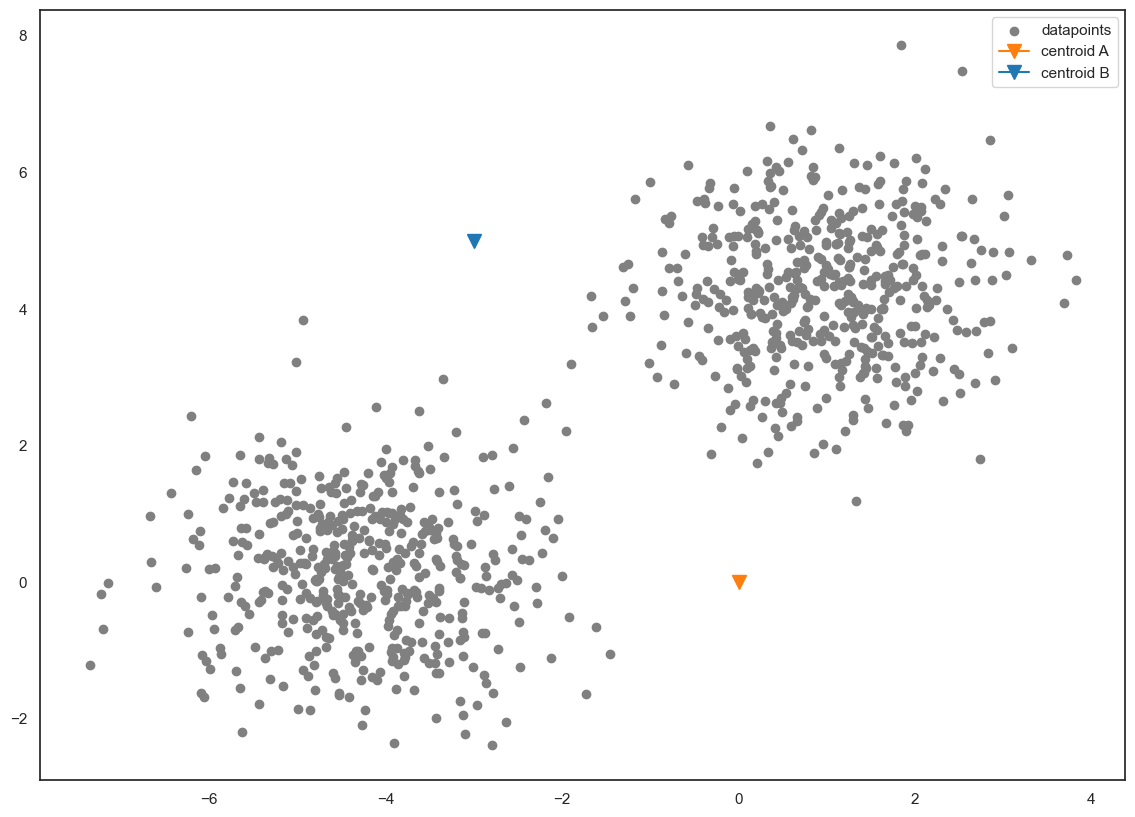

In [105]:
# visualize the datapoints and centroids
plt.figure()
plt.scatter(data[:,0],data[:,1],color = "gray", label = "datapoints")
plt.plot(centroid_A[0],centroid_A[1],color="tab:orange",marker="v", markersize= 10, label = "centroid A")
plt.plot(centroid_B[0],centroid_B[1],color="tab:blue", marker = "v", markersize= 10, label = "centroid B")
plt.legend()
# plt.show()

In [106]:
# 2
diff_vec_A = data - centroid_A
diff_vec_B = data - centroid_B

In [107]:
# 3
dist_vec_A = np.linalg.norm(diff_vec_A, axis=1)
dist_vec_B = np.linalg.norm(diff_vec_B, axis=1)

In [108]:
# 4
dist_vec = np.vstack((dist_vec_A, dist_vec_B)).T
cl_indices = np.argmin(dist_vec, axis=1)

In [109]:
# 5
cluster_A = data[cl_indices == 0]
cluster_B = data[cl_indices == 1]

In [110]:
# 6
centroid_A_new = np.mean(cluster_A, axis=0)
centroid_B_new = np.mean(cluster_B, axis=0)

In [111]:
# 7
centroid_dist_A = np.linalg.norm(centroid_A_new - centroid_A)
centroid_dist_B = np.linalg.norm(centroid_B_new - centroid_B)

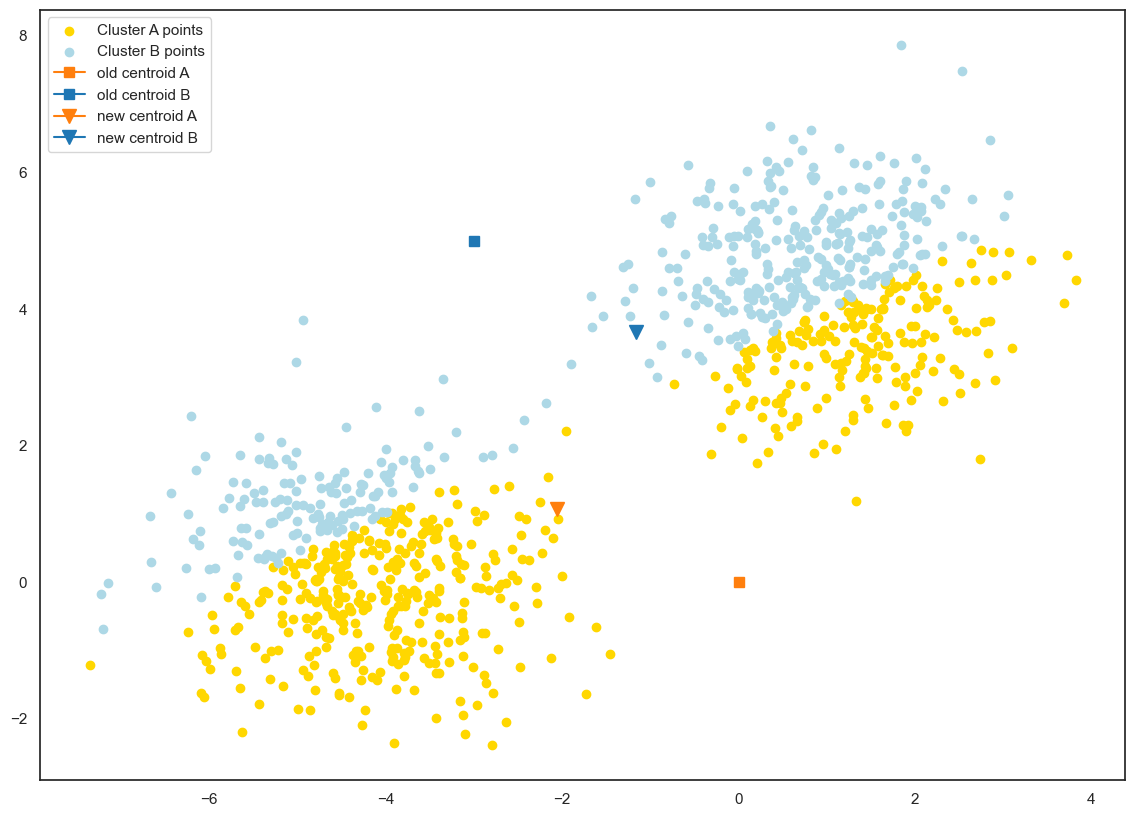

In [112]:
plt.figure()
plt.scatter(cluster_A[:,0],cluster_A[:,1],color = "gold", label = "Cluster A points")
plt.scatter(cluster_B[:,0],cluster_B[:,1],color = "lightblue", label = "Cluster B points")
plt.plot(centroid_A[0],centroid_A[1],color="tab:orange",marker="s", markersize= 7, label = "old centroid A")
plt.plot(centroid_B[0],centroid_B[1],color="tab:blue", marker = "s", markersize= 7, label = "old centroid B")
plt.plot(centroid_A_new[0],centroid_A_new[1],color="tab:orange",marker="v", markersize= 10, label = "new centroid A")
plt.plot(centroid_B_new[0],centroid_B_new[1],color="tab:blue", marker = "v", markersize= 10, label = "new centroid B")
plt.legend()
# plt.show()

In [113]:
print("below are the intermediate results for reference. Only the first 5 entries for each variable are printed")
print("\n")
print(f"data: \n{data[0:5,:]}")
print("\n")
print(f"centroid_A: \n{centroid_A}")
print(f"centroid_B: \n{centroid_B}")
print("\n")
print(f"diff_vec_A: \n{diff_vec_A[0:5,:]}")
print(f"diff_vec_B: \n{diff_vec_B[0:5,:]}")
print("\n")
print(f"dist_vec_A: \n{dist_vec_A[0:5]}")
print(f"dist_vec_B: \n{dist_vec_B[0:5]}")
print("\n")
print(f"cl_indices: \n{cl_indices[0:5]}")
print("\n")
print(f"cluster_A: \n{cluster_A[0:5]}")
print(f"cluster_B: \n{cluster_B[0:5]}")
print("\n")
print(f"centroid_A_new: \n{centroid_A_new}")
print(f"centroid_B_new: \n{centroid_B_new}")
print("\n")
print(f"centroid_dist_A: \n{centroid_dist_A}")
print(f"centroid_dist_B: \n{centroid_dist_B}")

below are the intermediate results for reference. Only the first 5 entries for each variable are printed


data: 
[[-3.13905951 -0.52526094]
 [ 1.50330212  5.17319815]
 [ 1.58766126  5.53800785]
 [-0.64322402  4.1822662 ]
 [ 1.14325315  6.35671961]]


centroid_A: 
[0 0]
centroid_B: 
[-3.  5.]


diff_vec_A: 
[[-3.13905951 -0.52526094]
 [ 1.50330212  5.17319815]
 [ 1.58766126  5.53800785]
 [-0.64322402  4.1822662 ]
 [ 1.14325315  6.35671961]]
diff_vec_B: 
[[-0.13905951 -5.52526094]
 [ 4.50330212  0.17319815]
 [ 4.58766126  0.53800785]
 [ 2.35677598 -0.8177338 ]
 [ 4.14325315  1.35671961]]


dist_vec_A: 
[3.18270226 5.38719745 5.76109358 4.23144038 6.45870822]
dist_vec_B: 
[5.52701059 4.50663151 4.61910038 2.49461051 4.35972875]


cl_indices: 
[0 1 1 1 1]


cluster_A: 
[[-3.13905951 -0.52526094]
 [-2.96101371 -1.79504245]
 [ 0.97411382  3.89022092]
 [-4.99015096 -1.8649859 ]
 [-4.30594546  0.64308604]]
cluster_B: 
[[ 1.50330212  5.17319815]
 [ 1.58766126  5.53800785]
 [-0.64322402  4.1822

In [114]:
def custom_kmeans(data, centroid_A, centroid_B):
    # Step 2: Compute difference vectors
    diff_vec_A = data - centroid_A
    diff_vec_B = data - centroid_B

    # Step 3: Compute Euclidean distances
    dist_vec_A = np.linalg.norm(diff_vec_A, axis=1)
    dist_vec_B = np.linalg.norm(diff_vec_B, axis=1)

    # Step 4: Assign clusters
    cl_indices = np.argmin(np.vstack((dist_vec_A, dist_vec_B)).T, axis=1)

    # Step 5: Find points in each cluster
    cluster_A = data[cl_indices == 0]
    cluster_B = data[cl_indices == 1]

    # Step 6: Compute new centroids
    centroid_A_new = np.mean(cluster_A, axis=0)
    centroid_B_new = np.mean(cluster_B, axis=0)

    # Step 7: Compute the movement of each centroid
    centroid_dist_A = np.linalg.norm(centroid_A_new - centroid_A)
    centroid_dist_B = np.linalg.norm(centroid_B_new - centroid_B)

    print(f"centroid A moved by: {np.round(centroid_dist_A, 3)}, centroid B by: {np.round(centroid_dist_B, 3)}")
    
    plt.figure()
    plt.scatter(cluster_A[:, 0], cluster_A[:, 1], color="gold", label="Cluster A points")
    plt.scatter(cluster_B[:, 0], cluster_B[:, 1], color="lightblue", label="Cluster B points")
    plt.plot(centroid_A[0], centroid_A[1], color="tab:orange", marker="s", markersize=7, label="Old Centroid A")
    plt.plot(centroid_B[0], centroid_B[1], color="tab:blue", marker="s", markersize=7, label="Old Centroid B")
    plt.plot(centroid_A_new[0], centroid_A_new[1], color="tab:orange", marker="v", markersize=10, label="New Centroid A")
    plt.plot(centroid_B_new[0], centroid_B_new[1], color="tab:blue", marker="v", markersize=10, label="New Centroid B")
    plt.legend()
    plt.show()

    return centroid_A_new, centroid_B_new, cluster_A, cluster_B

In [115]:
# Task 2
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# %matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [116]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")

In [117]:
penguins.to_csv("penguins.csv", index=False)
penguins = pd.read_csv("penguins.csv")
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [118]:
penguins = penguins.dropna()
penguins.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


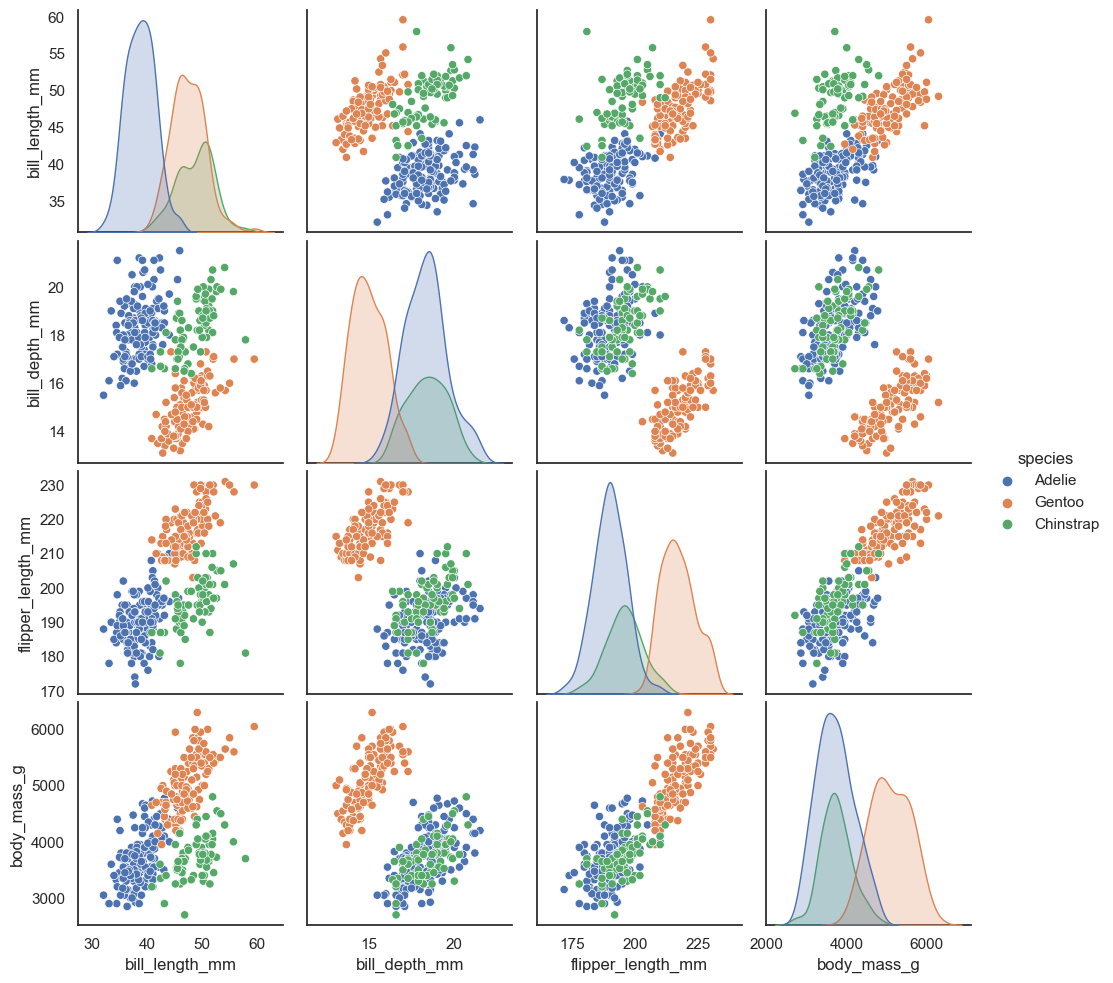

In [119]:
sns.pairplot(penguins.drop("year", axis=1), hue='species')
# plt.show()

In [120]:
def gt_label_indices(df,f):
    label_list = df[f].to_list()
    unique_list = list(np.unique(label_list))
    
    index_list = []
    for l in label_list:
        index_list.append(unique_list.index(l))
        
    return index_list

In [121]:
def kmeans(df,n_clusters,f1,f2):
    labels = cluster.KMeans(n_clusters=n_clusters, n_init=10).fit_predict(df[[f1,f2]])
    return labels

In [122]:
def spectral(df, n_clusters,f1,f2):

    labels = cluster.SpectralClustering(
        n_clusters=n_clusters,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=0).fit_predict(df[[f1, f2]])
    
    return labels  

In [123]:
def birch(df, n_clusters,f1,f2):
#     df = df.sample(frac=0.5)    answer = len(df['color'].unique())
    labels = cluster.Birch(branching_factor=200, threshold=1, n_clusters=n_clusters) \
                    .fit_predict(df[[f1, f2]])
    return labels

In [124]:
from sklearn import cluster
f1 = "flipper_length_mm"
f2 = "bill_length_mm"

In [125]:
gt_labels       = gt_label_indices(penguins,"species")
kmeans_labels   = kmeans(penguins,3,f1,f2)
spectral_labels = spectral(penguins,3,f1,f2)
birch_labels    = birch(penguins,3,f1,f2)

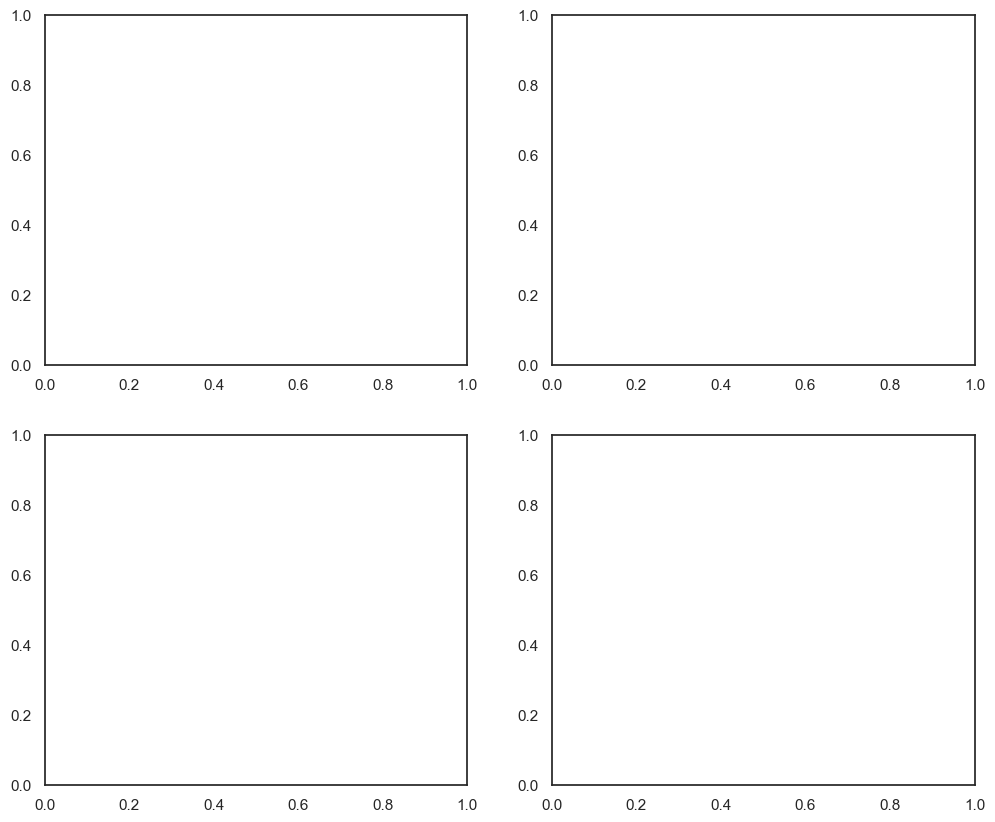

In [126]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

In [127]:
sns.scatterplot(data=penguins, x=f1, y=f2, hue = gt_labels,ax=axes[0,0])
axes[0,0].set_title("GT Labels")

Text(0.5, 1.0, 'GT Labels')

In [128]:
sns.scatterplot(data=penguins, x=f1, y=f2, hue = kmeans_labels,ax=axes[0,1])
axes[0,1].set_title("K-Means")

Text(0.5, 1.0, 'K-Means')

In [129]:
sns.scatterplot(data=penguins, x=f1, y=f2, hue = spectral_labels,ax=axes[1,0])
axes[1,0].set_title("spectral")

Text(0.5, 1.0, 'spectral')

In [130]:
sns.scatterplot(data=penguins, x=f1, y=f2, hue = birch_labels,ax=axes[1,1])
axes[1,1].set_title("BIRCH")

Text(0.5, 1.0, 'BIRCH')

In [131]:
# first we scale the data to normalize the range of values

penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

In [132]:
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)


In [133]:

from sklearn.decomposition import PCA
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

In [134]:
X_reduced = PCA(n_components=2).fit_transform(scaled_penguin_data)

In [135]:
print(X_reduced[:, 0].shape)


(333,)


In [136]:
pca_df = pd.DataFrame(data={"species":penguins["species"],
                       "feature1":X_reduced[:, 0],
                       "feature2":X_reduced[:, 1]})

[Text(0.5, 1.0, 'PCA')]

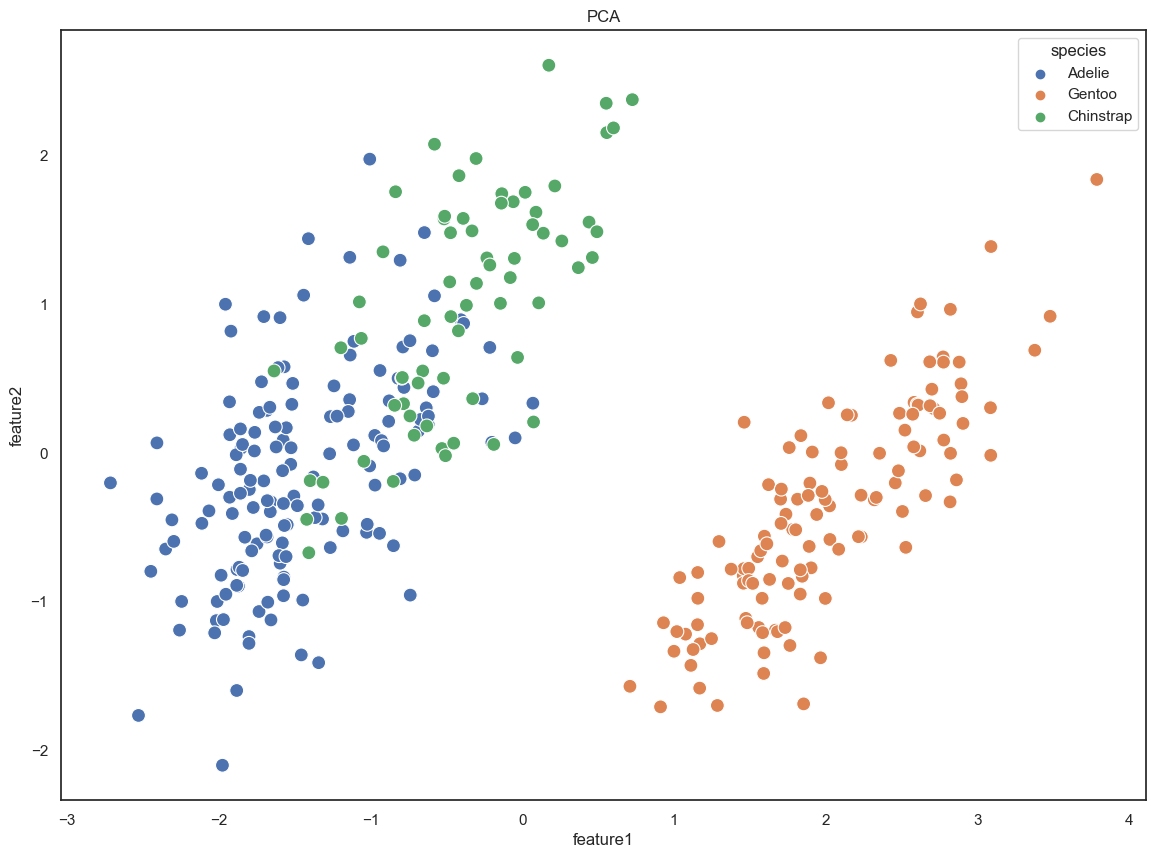

In [137]:
sns.scatterplot(data=pca_df, x="feature1", y="feature2", hue = "species", s=100).set(title='PCA')

In [138]:
# plt.scatter(
#     X_reduced[:, 0],
#     X_reduced[:, 1],
#     c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})],
#     s= 100,
#  )
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('PCA projection of the Penguin dataset', fontsize=24)

In [139]:
from sklearn import manifold

In [140]:
tsne = manifold.TSNE(n_components=3, init='pca', random_state=2)
X_tsne = tsne.fit_transform(scaled_penguin_data)

In [141]:
tsne_df = pd.DataFrame(data={"species":penguins["species"],
                       "feature1":X_tsne[:, 0],
                       "feature2":X_tsne[:, 1]})

[Text(0.5, 1.0, 'TSNE')]

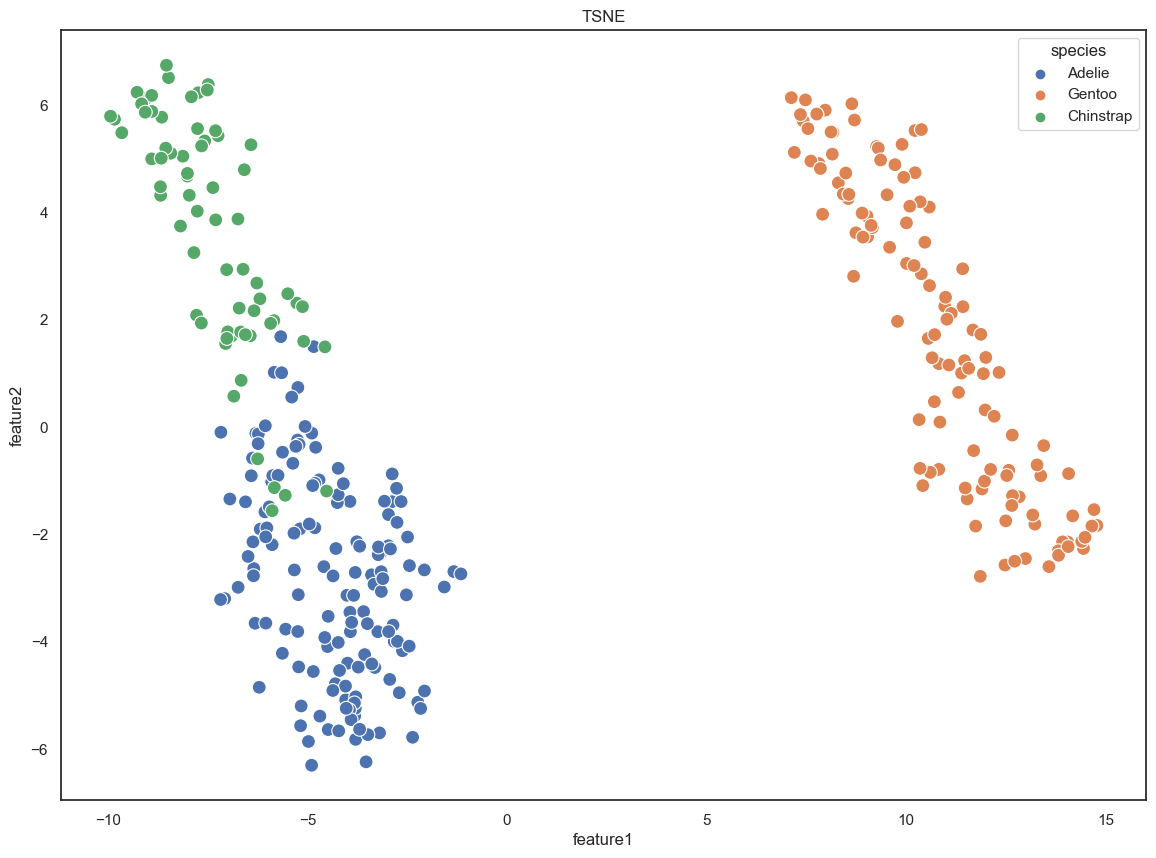

In [142]:
sns.scatterplot(data=tsne_df, x="feature1", y="feature2", hue = "species", s=100).set(title='TSNE')
# plt.show()

In [143]:
import umap


In [144]:
reducer = umap.UMAP()

In [145]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(333, 2)

In [146]:
umap_df = pd.DataFrame(data={"species":penguins["species"],
                       "feature1":embedding[:, 0],
                       "feature2":embedding[:, 1]})

[Text(0.5, 1.0, 'UMAP')]

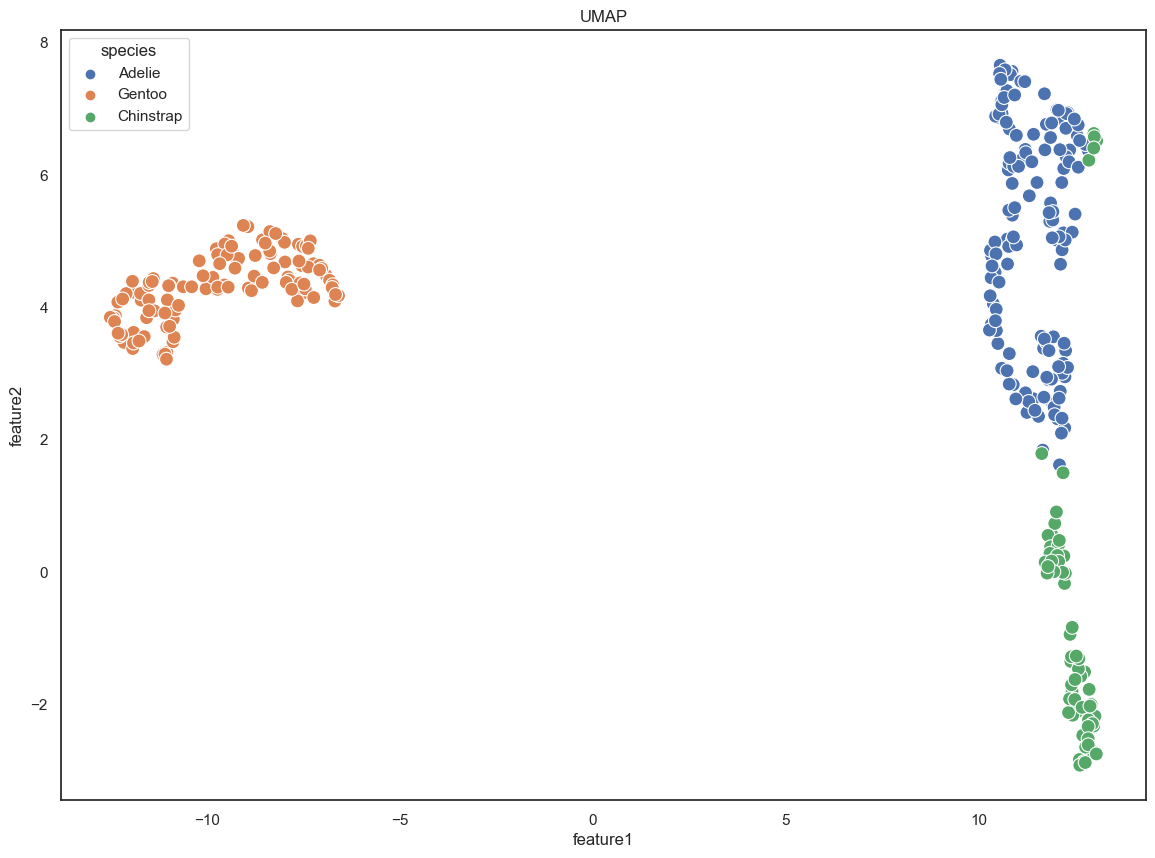

In [147]:
sns.scatterplot(data=umap_df, x="feature1", y="feature2", hue = "species", s=100).set(title='UMAP')
# plt.show()


In [148]:
f1 = "feature1"
f2 = "feature2"

In [149]:
gt_labels       = gt_label_indices(umap_df,"species")
kmeans_labels   = kmeans(umap_df,3,f1,f2)
spectral_labels = spectral(umap_df,3,f1,f2)
birch_labels    = birch(umap_df,3,f1,f2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


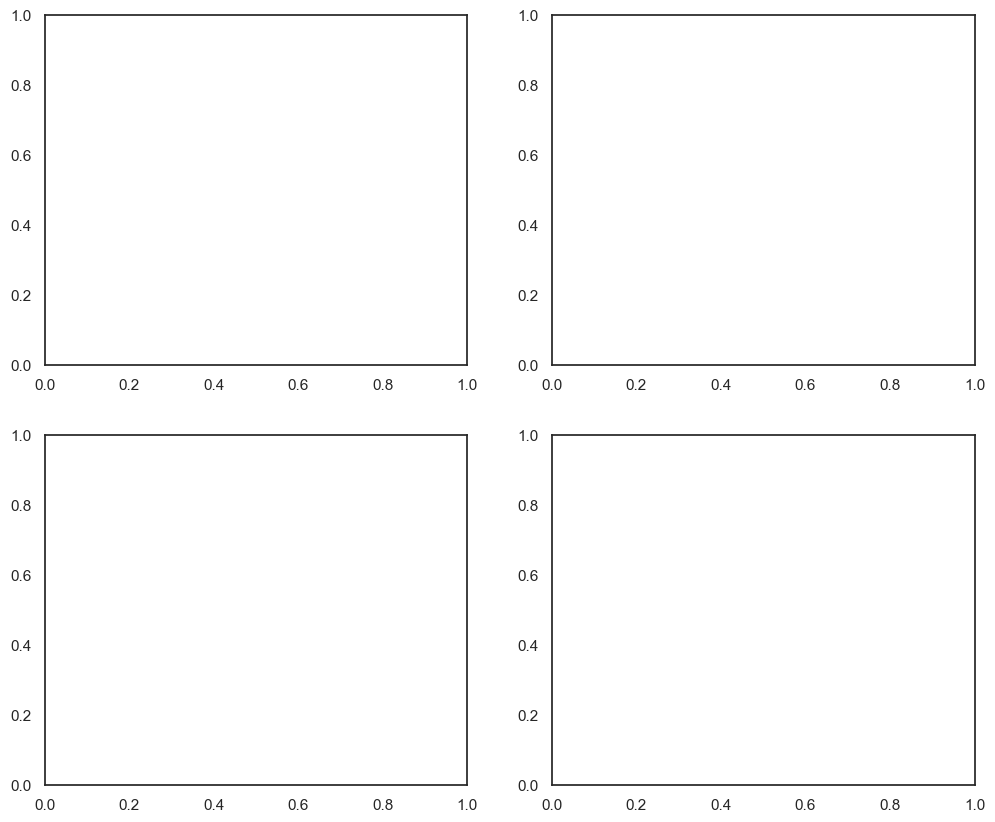

In [150]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

In [151]:
sns.scatterplot(data=umap_df, x=f1, y=f2, hue = gt_labels,ax=axes[0,0])
axes[0,0].set_title("GT Labels")


Text(0.5, 1.0, 'GT Labels')

In [152]:
sns.scatterplot(data=umap_df, x=f1, y=f2, hue = kmeans_labels,ax=axes[0,1])
axes[0,1].set_title("K-Means")

Text(0.5, 1.0, 'K-Means')

In [153]:
sns.scatterplot(data=umap_df, x=f1, y=f2, hue = spectral_labels,ax=axes[1,0])
axes[1,0].set_title("spectral")

Text(0.5, 1.0, 'spectral')

In [154]:
sns.scatterplot(data=umap_df, x=f1, y=f2, hue = birch_labels,ax=axes[1,1])
axes[1,1].set_title("BIRCH")

Text(0.5, 1.0, 'BIRCH')

In [155]:
penguins_clusters = penguins.copy()
penguins_clusters["cluster_index"] = birch_labels

In [156]:
cluster = 0


In [157]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # display(penguins_clusters.loc[penguins_clusters["cluster_index"]==cluster])
    print(penguins_clusters.loc[penguins_clusters["cluster_index"] == cluster])

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
6       Adelie  Torgersen            38.9           17.8              181.0   
7       Adelie  Torgersen            39.2           19.6              195.0   
12      Adelie  Torgersen            41.1           17.6              182.0   
13      Adelie  Torgersen            38.6           21.2              191.0   
14      Adelie  Torgersen            34.6           21.1              198.0   
15      Adelie  Torgersen            36.6           17.8              185.0   
16      Adelie  Torgersen            38.7           

In [158]:
# task 3
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt
# plt.ion()
import seaborn as sns
import pandas as pd
# %matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [159]:
fastfood = pd.read_csv("https://raw.githubusercontent.com/charlesanthony1996/billionaires_dataset/main/fastfood.csv")


In [160]:
fastfood.to_csv("fastfood.csv", index=False)
fastfood = pd.read_csv("fastfood.csv")
fastfood = fastfood.head(200)
print(fastfood.head())

  restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0    4.0

In [161]:
# penguins = penguins.dropna()
# penguins.species.value_counts()
fastfood = fastfood.dropna()
fastfood.restaurant.value_counts()

restaurant
Mcdonalds      57
Sonic          49
Arbys          25
Chick Fil-A    21
Name: count, dtype: int64

In [162]:
# sns.pairplot(penguins.drop("year", axis=1), hue='species')
# sns.pairplot(fastfood.drop("salad", axis=1), hue='restaurant')
plt.tight_layout()
# plt.show()

<Figure size 1400x1000 with 0 Axes>

In [163]:
from sklearn import cluster
f1 = "total_fat"
f2 = "protein"

In [164]:
gt_labels       = gt_label_indices(fastfood,"restaurant")
kmeans_labels   = kmeans(fastfood,3,f1,f2)
spectral_labels = spectral(fastfood,3,f1,f2)
birch_labels    = birch(fastfood,3,f1,f2)

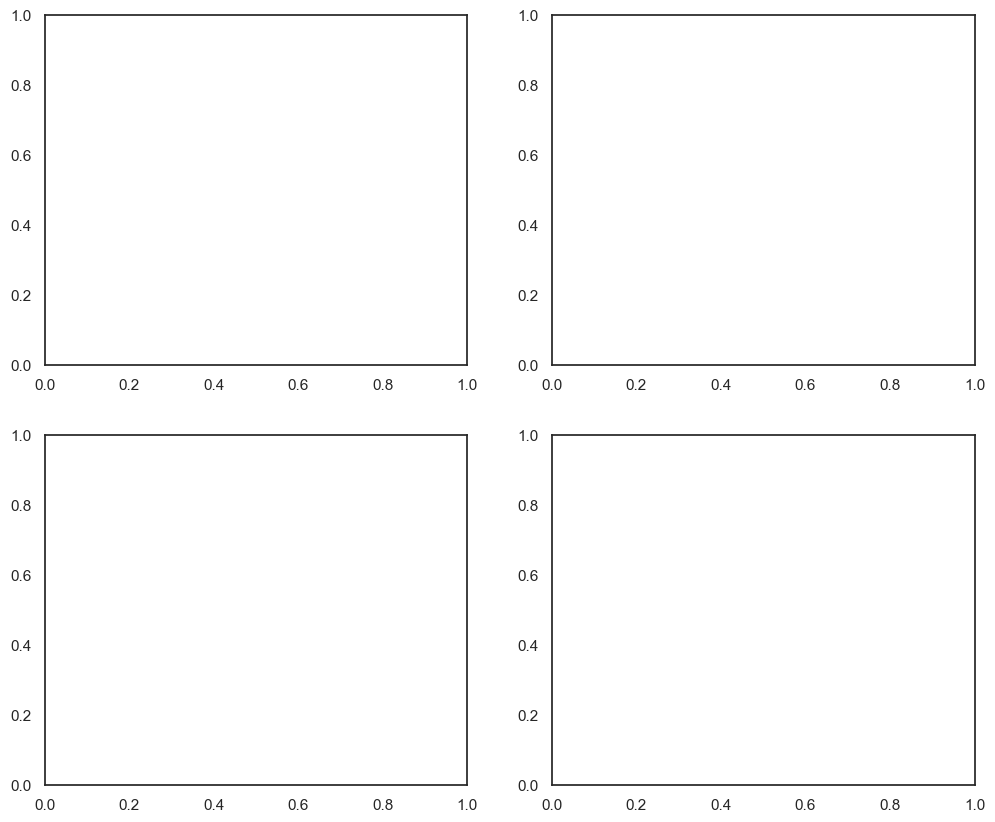

In [165]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

In [166]:
sns.scatterplot(data=fastfood, x=f1, y=f2, hue = gt_labels,ax=axes[0,0])
axes[0,0].set_title("GT Labels")

Text(0.5, 1.0, 'GT Labels')

In [167]:
sns.scatterplot(data=fastfood, x=f1, y=f2, hue = kmeans_labels,ax=axes[0,1])
axes[0,1].set_title("K-Means")

Text(0.5, 1.0, 'K-Means')

In [168]:
sns.scatterplot(data=fastfood, x=f1, y=f2, hue = spectral_labels,ax=axes[1,0])
axes[1,0].set_title("spectral")

Text(0.5, 1.0, 'spectral')

In [169]:
sns.scatterplot(data=fastfood, x=f1, y=f2, hue = birch_labels,ax=axes[1,1])
axes[1,1].set_title("BIRCH")
# plt.show()

Text(0.5, 1.0, 'BIRCH')

In [170]:
# first we scale the data to normalize the range of values

fastfood_data = fastfood[
    [
        "total_fat",
        "protein",
        "calcium",
        "sugar",
    ]
].values

In [171]:
scaled_fastfood_data = StandardScaler().fit_transform(fastfood_data)

In [172]:
from sklearn.decomposition import PCA
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

In [173]:
X_reduced = PCA(n_components=2).fit_transform(scaled_fastfood_data)

In [174]:
print(X_reduced[:, 0].shape)

(152,)


In [175]:
pca_df = pd.DataFrame(data={"restaurant":fastfood["restaurant"],
                       "feature1":X_reduced[:, 0],
                       "feature2":X_reduced[:, 1]})

[Text(0.5, 1.0, 'PCA')]

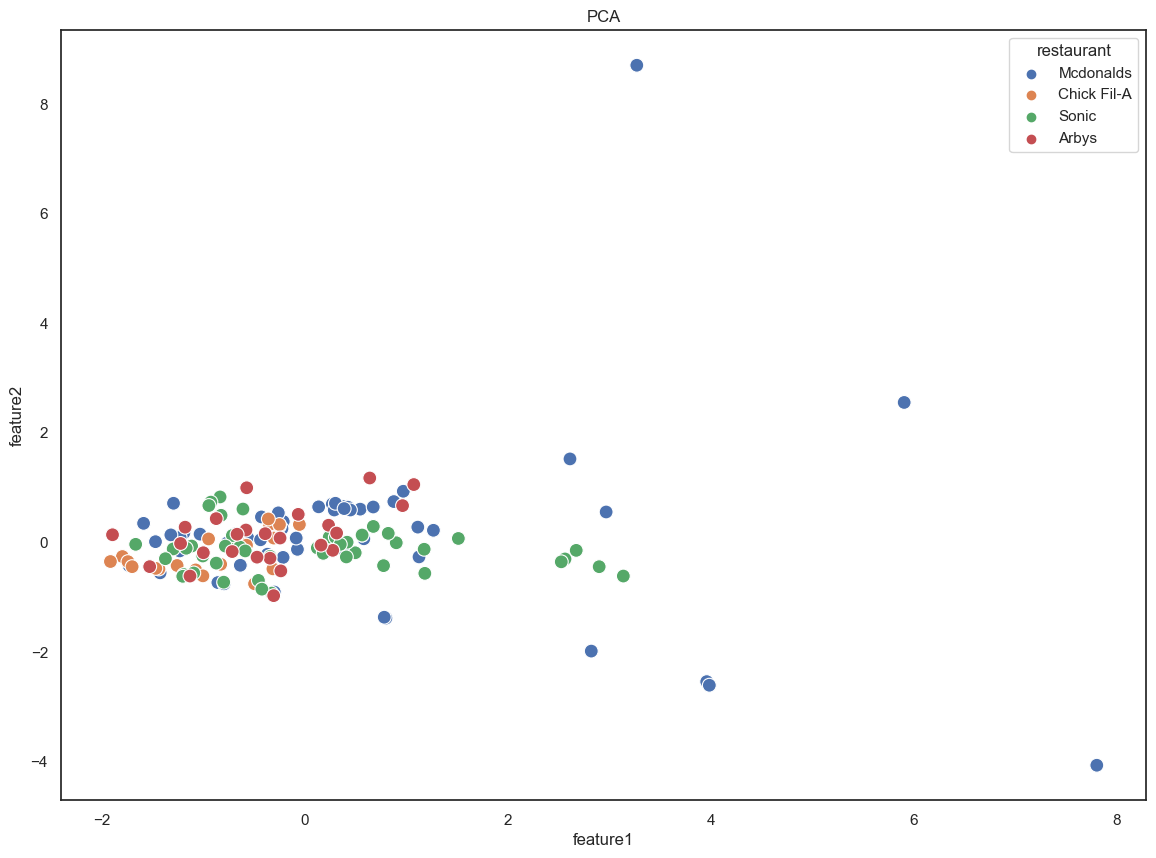

In [176]:
sns.scatterplot(data=pca_df, x="feature1", y="feature2", hue = "restaurant", s=100).set(title='PCA')
# plt.show()

In [177]:
from sklearn import manifold

In [178]:
tsne = manifold.TSNE(n_components=3, init='pca', random_state=2)
X_tsne = tsne.fit_transform(scaled_fastfood_data)

In [179]:
tsne_df = pd.DataFrame(data={"restaurant":fastfood["restaurant"],
                       "feature1":X_tsne[:, 0],
                       "feature2":X_tsne[:, 1]})

[Text(0.5, 1.0, 'TSNE')]

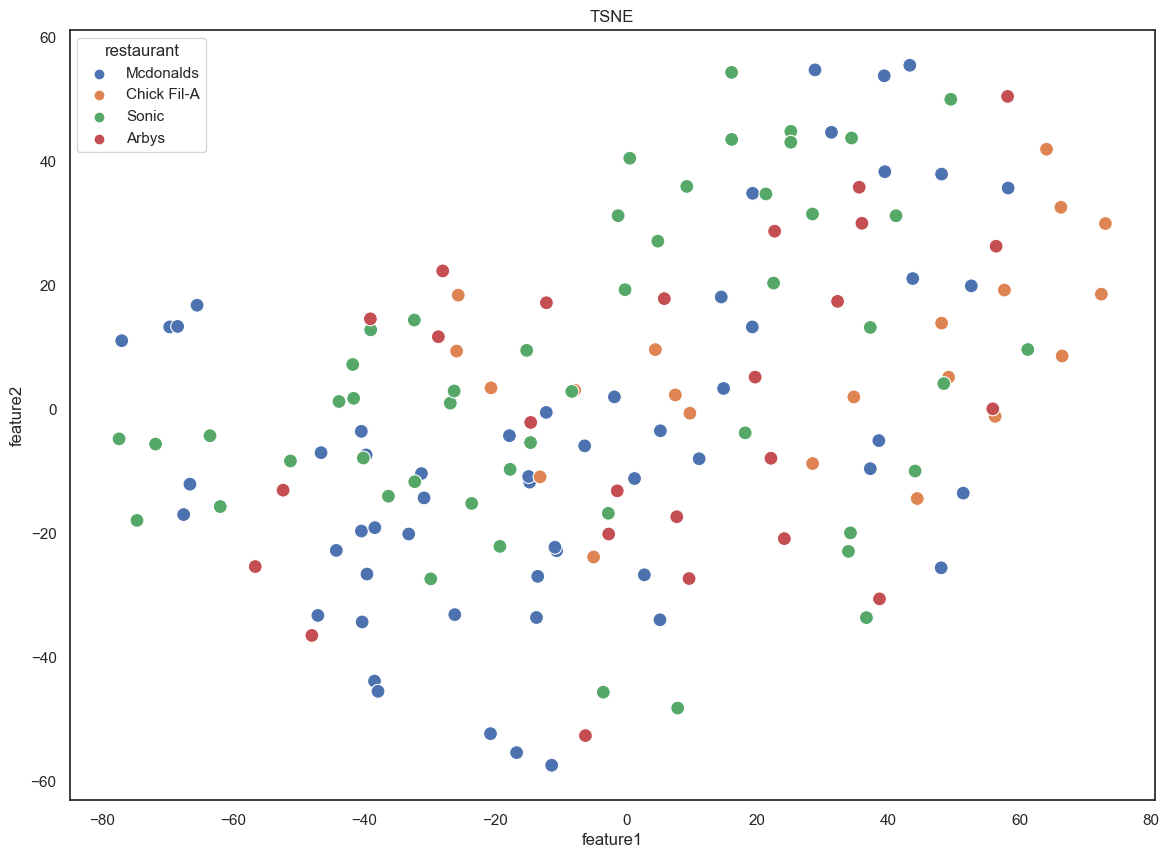

In [180]:
sns.scatterplot(data=tsne_df, x="feature1", y="feature2", hue = "restaurant", s=100).set(title='TSNE')
# plt.show()

In [181]:
import umap

In [182]:
reducer = umap.UMAP()

In [183]:
embedding = reducer.fit_transform(scaled_fastfood_data)
embedding.shape

(152, 2)

In [184]:
umap_df = pd.DataFrame(data={"restaurant":fastfood["restaurant"],
                       "feature1":embedding[:, 0],
                       "feature2":embedding[:, 1]})

[Text(0.5, 1.0, 'UMAP')]

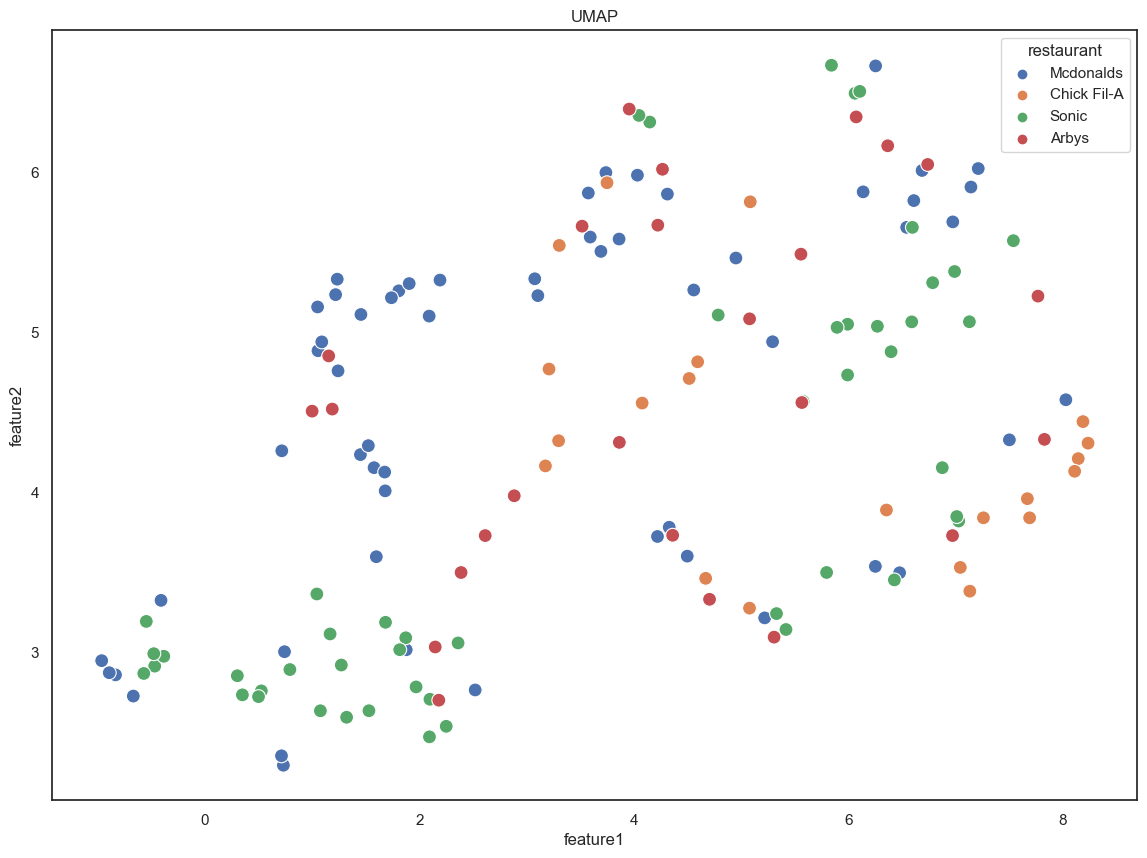

In [185]:
sns.scatterplot(data=umap_df, x="feature1", y="feature2", hue = "restaurant", s=100).set(title='UMAP')
# plt.show()

In [186]:
f1 = "feature1"
f2 = "feature2"

In [187]:
gt_labels       = gt_label_indices(umap_df,"restaurant")
kmeans_labels   = kmeans(umap_df,3,f1,f2)
spectral_labels = spectral(umap_df,3,f1,f2)
birch_labels    = birch(umap_df,3,f1,f2)

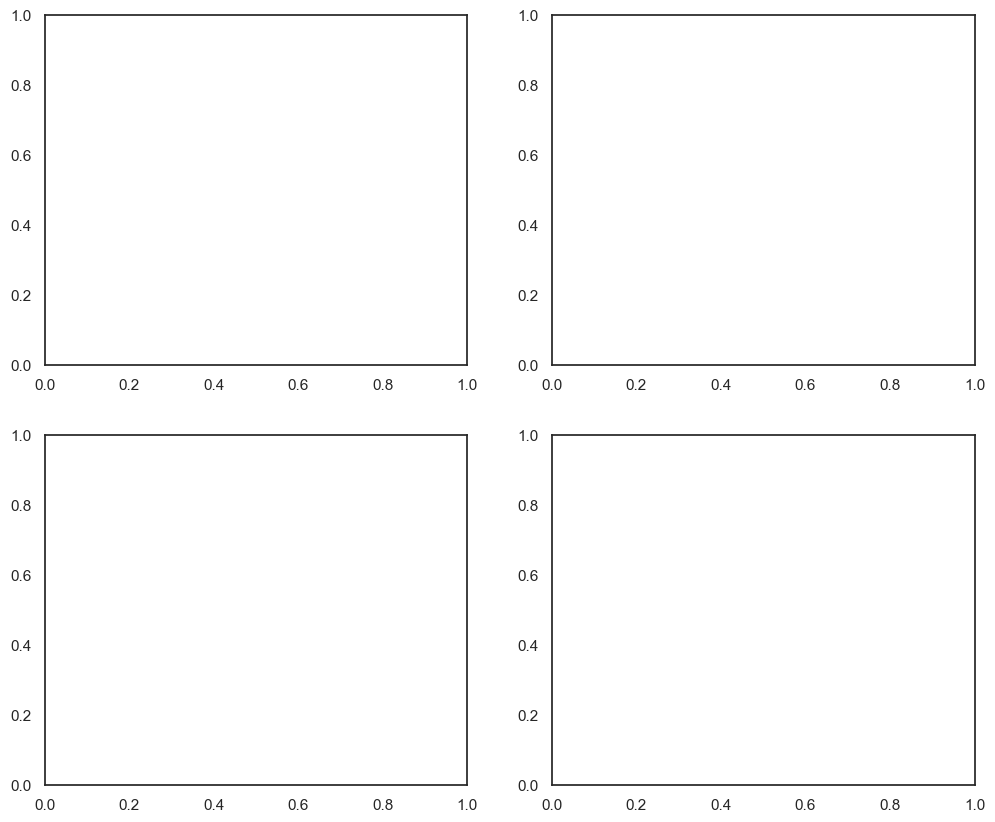

In [188]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

In [189]:
sns.scatterplot(data=umap_df, x=f1, y=f2, hue = gt_labels,ax=axes[0,0])
axes[0,0].set_title("GT Labels")

Text(0.5, 1.0, 'GT Labels')

In [190]:
sns.scatterplot(data=umap_df, x=f1, y=f2, hue = kmeans_labels,ax=axes[0,1])
axes[0,1].set_title("K-Means")

Text(0.5, 1.0, 'K-Means')

In [191]:
sns.scatterplot(data=umap_df, x=f1, y=f2, hue = spectral_labels,ax=axes[1,0])
axes[1,0].set_title("spectral")

Text(0.5, 1.0, 'spectral')

In [192]:
sns.scatterplot(data=umap_df, x=f1, y=f2, hue = birch_labels,ax=axes[1,1])
axes[1,1].set_title("BIRCH")

Text(0.5, 1.0, 'BIRCH')

In [193]:
fastfood_clusters = fastfood.copy()
fastfood_clusters["cluster_index"] = birch_labels

In [194]:
cluster = 0

In [195]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # display(fastfood_clusters.loc[fastfood_clusters["cluster_index"]==cluster])
    print(fastfood_clusters.loc[fastfood_clusters["cluster_index"] == cluster])

    restaurant                                              item  calories  \
1    Mcdonalds                    Single Bacon Smokehouse Burger       840   
2    Mcdonalds                    Double Bacon Smokehouse Burger      1130   
3    Mcdonalds         Grilled Bacon Smokehouse Chicken Sandwich       750   
4    Mcdonalds          Crispy Bacon Smokehouse Chicken Sandwich       920   
9    Mcdonalds               Double Quarter Pounder® with Cheese       770   
11   Mcdonalds                       Garlic White Cheddar Burger       620   
12   Mcdonalds     Grilled Garlic White Cheddar Chicken Sandwich       530   
13   Mcdonalds      Crispy Garlic White Cheddar Chicken Sandwich       700   
16   Mcdonalds                   Maple Bacon Dijon 1/4 lb Burger       640   
17   Mcdonalds        Grilled Maple Bacon Dijon Chicken Sandwich       580   
18   Mcdonalds         Crispy Maple Bacon Dijon Chicken Sandwich       740   
22   Mcdonalds                      Pico Guacamole 1/4 lb Burger